In [46]:
import pandas as pd
import numpy as np
import re

In [47]:
movies = pd.read_csv("dataset_movies.csv")
rotten = pd.read_csv("dataset2_rotten_tomatoes_movies.csv")

In [48]:
#First 20 rows to see how data looks
movies.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


In [49]:
#First 20 rows to see how data looks
rotten.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [50]:
#Missing values_movies
movies.isnull().sum()

Title                 0
Rating                1
Year                  0
Month                 0
Certificate          34
Runtime               0
Directors             0
Stars                 0
Genre                 0
Filming_location      0
Budget                0
Income                0
Country_of_origin     0
dtype: int64

In [51]:
movies.dtypes

Title                 object
Rating               float64
Year                   int64
Month                 object
Certificate           object
Runtime               object
Directors             object
Stars                 object
Genre                 object
Filming_location      object
Budget                object
Income                object
Country_of_origin     object
dtype: object

In [52]:
rotten.dtypes

movie_title            object
movie_info             object
critics_consensus      object
rating                 object
genre                  object
directors              object
writers                object
cast                   object
in_theaters_date       object
on_streaming_date      object
runtime_in_minutes    float64
studio_name            object
tomatometer_status     object
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
audience_count        float64
dtype: object

In [53]:
#Turn "Unknown" into missing values (NaN)
movies = movies.replace('Unknown', np.nan) 

In [54]:
rotten.replace('Unknown', np.nan) 

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0,1192.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,100946.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0,7126.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0,30170.0


In [55]:
#Missing values_rotten
rotten.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
audience_count         252
dtype: int64

In [56]:
movies.isnull().sum()

Title                  0
Rating                 1
Year                   0
Month                  0
Certificate           34
Runtime                2
Directors              0
Stars                  0
Genre                  0
Filming_location      76
Budget               304
Income               145
Country_of_origin      0
dtype: int64

In [57]:
#Convert to USD
exchange_rates = {
    '$': 1,          
    '€': 1.08,        
    '£': 1.27,           
    '₹': 0.012,        
    '₩': 0.00074,
    '¥': 0.0067,         
    'CN¥': 0.14,         
    'A$': 0.66,           
    'CA$': 0.74,          
    'SEK': 0.095,        
    'DKK': 0.15,          
    'NOK': 0.095,         
}

In [58]:
symbols = sorted(exchange_rates.keys(), key=len, reverse=True)

In [59]:
def parse_currency(value):
    if pd.isna(value):
        return pd.Series([np.nan, np.nan])

    s = str(value).strip()

    currency = np.nan
    for sym in symbols:
        if s.startswith(sym):
            currency = sym
            s = s[len(sym):].strip() 
            break

    if pd.isna(currency):
        return pd.Series([np.nan, np.nan])

    num_str = re.sub(r'[^0-9.]', '', s)
    if num_str == '':
        amount = np.nan
    else:
        amount = float(num_str)

    return pd.Series([currency, amount])

In [60]:
movies[['currency', 'amount']] = movies['Budget'].apply(parse_currency)

In [61]:
movies['Budget_USD'] = movies.apply(
    lambda row: row['amount'] * exchange_rates.get(row['currency'], np.nan),
    axis=1
)

In [62]:
movies[['Budget', 'currency', 'amount', 'Budget_USD']].head(20)

,Budget,currency,amount,Budget_USD
0,"$350,000,000",$,350000000.0,350000000.0
1,"$35,000,000",$,35000000.0,35000000.0
2,"$85,900,000",$,85900000.0,85900000.0
3,NaN,NaN,NaN,NaN
4,"$12,000,000",$,12000000.0,12000000.0
5,"$120,000,000",$,120000000.0,120000000.0
6,"$80,000,000",$,80000000.0,80000000.0
7,"$20,000,000",$,20000000.0,20000000.0
8,"$10,000,000",$,10000000.0,10000000.0
9,"$40,000,000",$,40000000.0,40000000.0


In [63]:
movies[['income_currency', 'income_amount']] = movies['Income'].apply(parse_currency)

In [64]:
movies['Income_USD'] = movies.apply(
    lambda row: row['income_amount'] * exchange_rates.get(row['income_currency'], np.nan),
    axis=1
)

In [65]:
movies[['Income', 'income_currency', 'income_amount', 'Income_USD']].head(20)

,Income,income_currency,income_amount,Income_USD
0,"$2,267,946,983",$,2.267947e+09,2.267947e+09
1,"$108,967",$,1.089670e+05,1.089670e+05
2,"$239,268,602",$,2.392686e+08,2.392686e+08
3,"$19,720,823",$,1.972082e+07,1.972082e+07
4,"$171,253,910",$,1.712539e+08,1.712539e+08
5,NaN,NaN,NaN,NaN
6,"$31,245,810",$,3.124581e+07,3.124581e+07
7,"$59,595,460",$,5.959546e+07,5.959546e+07
8,"$31,104,312",$,3.110431e+07,3.110431e+07
9,"$9,500,361",$,9.500361e+06,9.500361e+06


In [66]:
movies.isnull().sum()

Title                  0
Rating                 1
Year                   0
Month                  0
Certificate           34
Runtime                2
Directors              0
Stars                  0
Genre                  0
Filming_location      76
Budget               304
Income               145
Country_of_origin      0
currency             304
amount               304
Budget_USD           304
income_currency      145
income_amount        145
Income_USD           145
dtype: int64

In [67]:
rotten.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
audience_count         252
dtype: int64

In [68]:
#Drop missing values
movies = movies.dropna()
rotten = rotten.dropna()

In [69]:
len(movies)

1605

In [70]:
len(rotten)

7610

In [71]:
#Compute profit and ROI
movies['Profit_USD'] = movies['Income_USD'] - movies['Budget_USD']
movies['ROI'] = movies['Profit_USD'] / movies['Budget_USD']
movies['ROI_pct'] = movies['ROI'] * 100

#ROI(Return On Investment) - how much profit you made compared to how much you invested.

In [72]:
movies[['Title', 'Budget', 'Income', 'Budget_USD', 'Income_USD', 'Profit_USD', 'ROI_pct']].head()


,Title,Budget,Income,Budget_USD,Income_USD,Profit_USD,ROI_pct
0,Avatar: The Way of Water,"$350,000,000","$2,267,946,983",350000000.0,2.267947e+09,1.917947e+09,547.984852
1,Guillermo del Toro's Pinocchio,"$35,000,000","$108,967",35000000.0,1.089670e+05,-3.489103e+07,-99.688666
2,Bullet Train,"$85,900,000","$239,268,602",85900000.0,2.392686e+08,1.533686e+08,178.543192
4,M3gan,"$12,000,000","$171,253,910",12000000.0,1.712539e+08,1.592539e+08,1327.115917
6,Amsterdam,"$80,000,000","$31,245,810",80000000.0,3.124581e+07,-4.875419e+07,-60.942737


In [73]:
#Convert titles to lowercase strings and remove whitespace
movies['user_id'] = movies['Title'].astype(str).str.strip().str.lower()
rotten['id']      = rotten['movie_title'].astype(str).str.strip().str.lower()

In [74]:
#Convert the in-theaters date to a datetime object
rotten['release_date'] = pd.to_datetime(rotten['in_theaters_date'], errors='coerce')
rotten['year'] = rotten['release_date'].dt.year


In [75]:
#Join movies with Rotten Tomatoes data on title and release year
rotten_sorted = rotten.sort_values('release_date')

rotten_unique = rotten_sorted.drop_duplicates(
    subset=['movie_title', 'year'],
    keep='first'
)

rotten_filtered = rotten_unique[
    [ 'movie_title','year',
     'studio_name', 'tomatometer_status', 'tomatometer_rating',
     'tomatometer_count', 'audience_rating', 'audience_count']
]

In [76]:
movies['year'] = movies['Year']          
rotten['year'] = pd.to_datetime(rotten['in_theaters_date']).dt.year

merged = movies.merge(
    rotten_filtered,
    how='left',
    left_on=['Title'],
    right_on=['movie_title']
)

print(len(movies), len(merged)) 


1605 1679


In [77]:
merged.columns

Index(['Title', 'Rating', 'Year', 'Month', 'Certificate', 'Runtime',
       'Directors', 'Stars', 'Genre', 'Filming_location', 'Budget', 'Income',
       'Country_of_origin', 'currency', 'amount', 'Budget_USD',
       'income_currency', 'income_amount', 'Income_USD', 'Profit_USD', 'ROI',
       'ROI_pct', 'user_id', 'year_x', 'movie_title', 'year_y', 'studio_name',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_rating', 'audience_count'],
      dtype='object')

In [78]:
merged.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,...,user_id,year_x,movie_title,year_y,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,...,avatar: the way of water,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,...,guillermo del toro's pinocchio,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,...,bullet train,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,...,m3gan,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amsterdam,6.1,2022,October,R,134,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,...,amsterdam,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
merged['Country_of_origin']

0                                           United States
1                           United States, Mexico, France
2                                    Japan, United States
3                                           United States
4                                    United States, Japan
                              ...                        
1674                                        United States
1675     United Kingdom, Australia, France, United States
1676    United States, Germany, Japan, United Kingdom,...
1677                 United States, France, Canada, Spain
1678                                        United States
Name: Country_of_origin, Length: 1679, dtype: object

In [80]:
#Numnber of rows with a non-missing rating
rating_not_missing = len(merged) - merged['tomatometer_rating'].notna().sum()
print(rating_not_missing)

362


In [81]:
movies['Genre_list'] = movies['Genre'].str.split(',').apply(lambda x: [g.strip() for g in x])

movies_exploded = movies.explode('Genre_list')


In [82]:
#Genre ranking
merged['Genre_list'] = merged['Genre'].str.split(', ')
genre_df = merged.explode('Genre_list')
genre_counts = genre_df['Genre_list'].value_counts()
print(genre_counts)

Genre_list
Drama        794
Action       617
Comedy       541
Adventure    488
Thriller     300
Crime        278
Romance      227
Horror       211
Sci-Fi       210
Fantasy      192
Mystery      183
Biography    114
Family       104
Animation     70
History       44
Music         39
Sport         26
War           17
Musical       15
Western       10
Name: count, dtype: int64


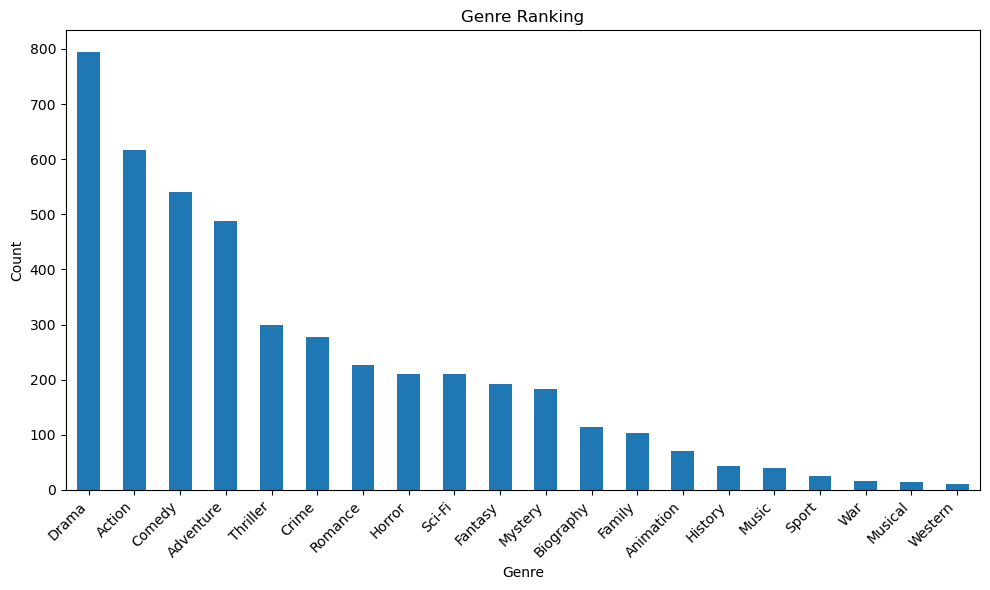

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Ranking')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


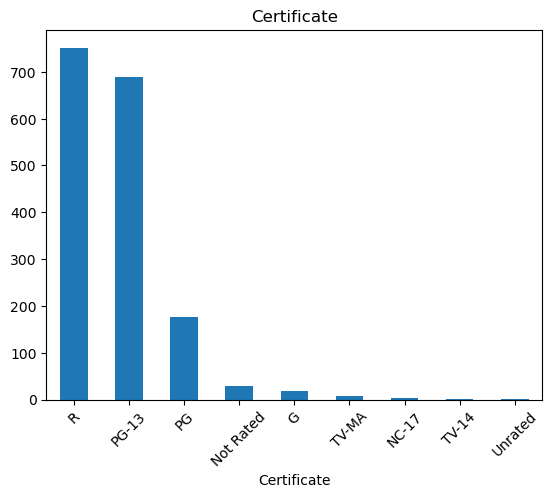

In [84]:
#Movie certificate ranking
merged['Certificate'].value_counts().plot(kind='bar')
plt.title('Certificate')
plt.xticks(rotation=45)
plt.show()

In [85]:
#Top 10 countries of origin
country_df = (
    merged['Country_of_origin']
    .str.split(',')                
    .explode()                     
    .str.strip()                   
    .value_counts()                
)


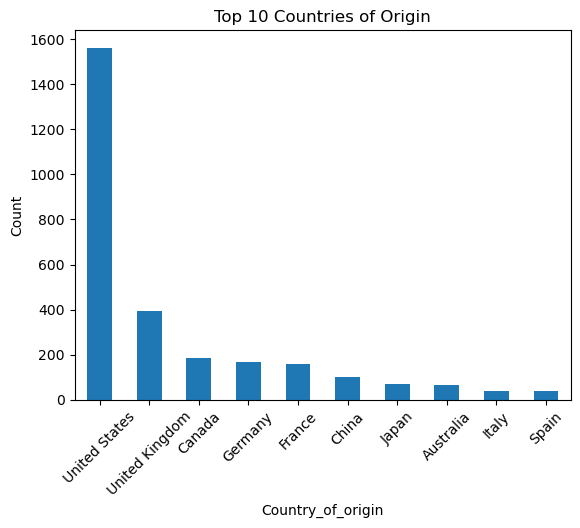

In [86]:
country_df.head(10).plot(
    kind='bar',
    x='Country',
    y='Count',
    legend=False
)
plt.ylabel('Count')
plt.title('Top 10 Countries of Origin')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Year'>

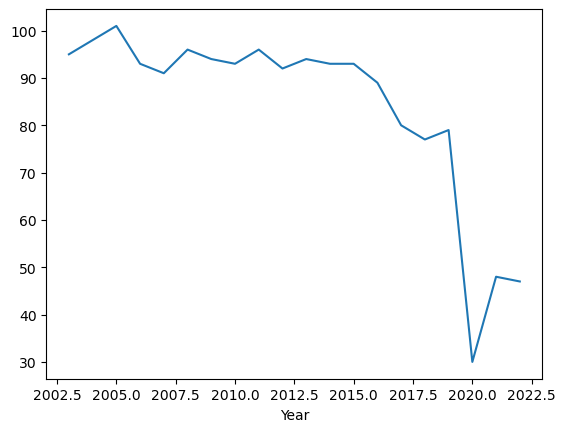

In [103]:
#Number of Movies by Year
merged['Year'].value_counts().sort_index().plot()

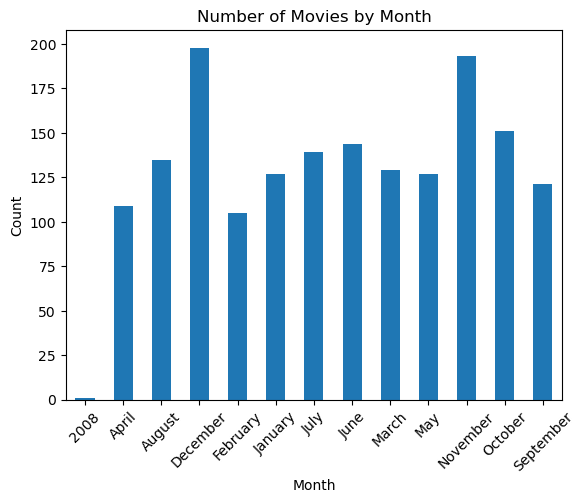

In [99]:
#Number of Movies by Month
#Only 482 rows
merged['Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies by Month')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [89]:
directors_df = (
    merged['Directors']
    .str.split(',')                
    .explode()                     
    .str.strip()                   
    .value_counts()                
)

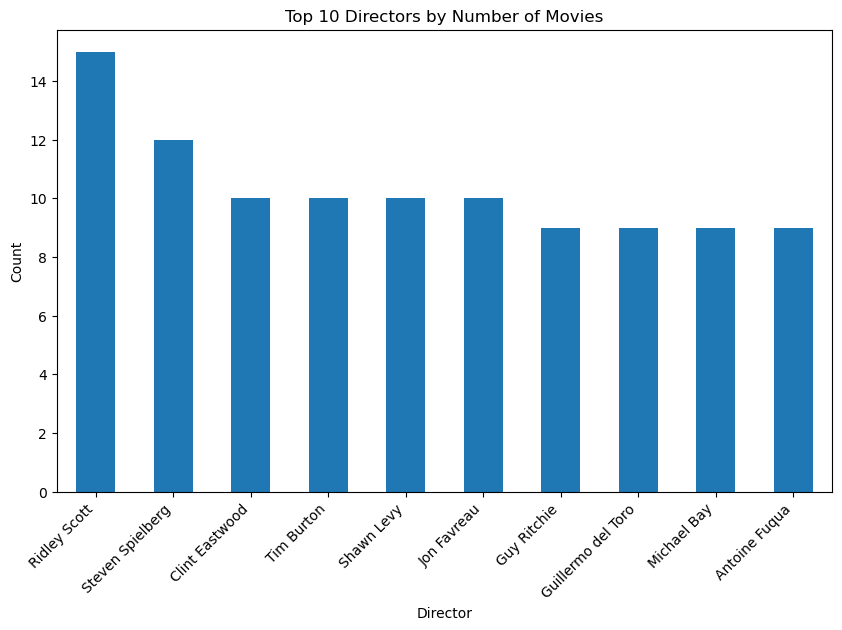

In [100]:
#Top 10 Directors by Number of Movies
directors_df.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='ROI_pct', ylabel='Count'>

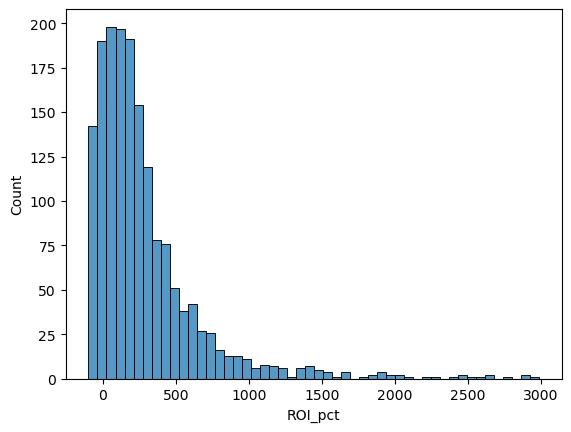

In [90]:
import seaborn as sns

#ROI Distribution
upper = merged['ROI_pct'].quantile(0.99)

sns.histplot(
    merged.loc[merged['ROI_pct'] <= upper, 'ROI_pct'],
    bins=50
)


<Axes: xlabel='Income_USD', ylabel='Count'>

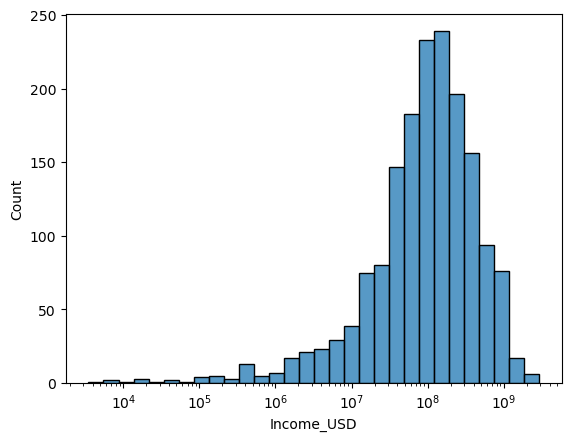

In [91]:
#Income Distiribution
sns.histplot(merged['Income_USD'], bins=30, log_scale=True)

#highly right-skewed

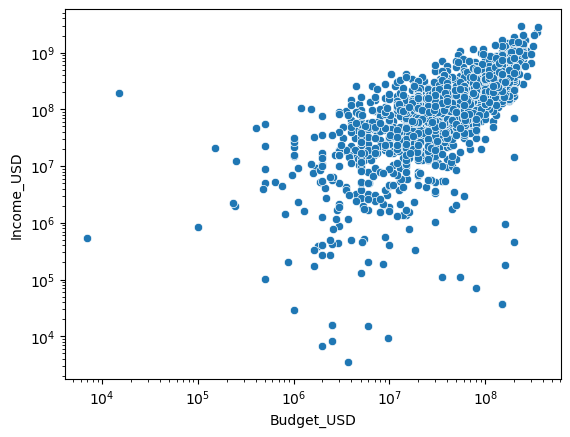

In [92]:
#Relation between income and budget
sns.scatterplot(
    data=merged,
    x='Budget_USD',
    y='Income_USD'
)
plt.xscale('log')
plt.yscale('log')


There is a clear positive correlation, indicating that movies with higher production budgets 
tend to generate higher incomes,  
although there is considerable variability and several outliers.

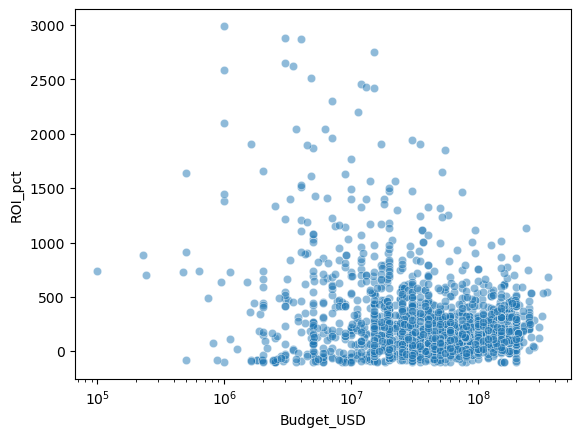

In [93]:
#Relationship between movie budget and return on investment
roi_cut = merged['ROI_pct'].quantile(0.99)

merged_plot = merged[
    (merged['ROI_pct'] <= roi_cut) &
    (merged['Budget_USD'] > 0)
]

sns.scatterplot(
    data= merged_plot,
    x='Budget_USD',
    y='ROI_pct',
    alpha=0.5
)

plt.xscale('log')


In [94]:
df_genre = merged.copy()

df_genre['Genre'] = df_genre['Genre'].str.split(',')
df_genre = df_genre.explode('Genre')

df_genre['Genre'] = df_genre['Genre'].str.strip()


In [102]:
#Average movie ratings by genre.
genre_rating = (
    df_genre.groupby('Genre')['Rating']
    .agg(
        mean_rating='mean',
        count='count'
    )
    .sort_values('mean_rating', ascending=False)
)

genre_rating


,mean_rating,count
Genre,,
War,7.500000,17
Biography,7.370175,114
History,7.222727,44
Western,7.080000,10
Sport,7.007692,26
Drama,7.000756,794
Animation,6.994286,70
Music,6.943590,39
Crime,6.841727,278


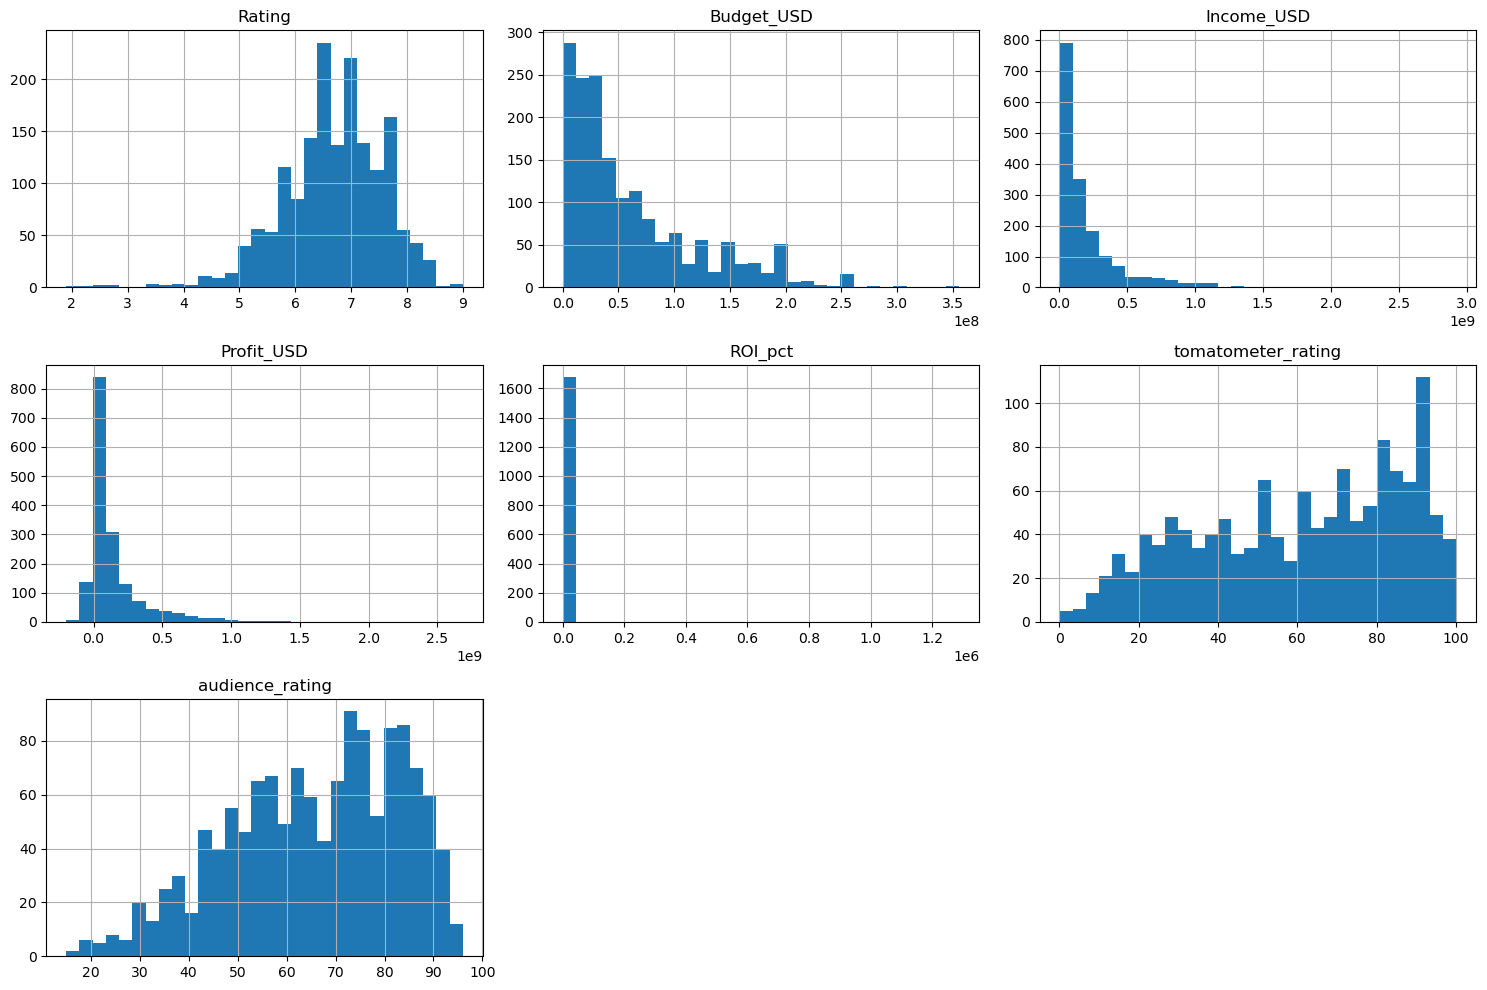

In [96]:
#Bar charts for every column
#For tomatometer_rating and audience rating, there is only 482 columns.
num_cols = ['Rating','Runtime','Budget_USD','Income_USD',
            'Profit_USD','ROI_pct','tomatometer_rating','audience_rating']

merged[num_cols].hist(bins=30, figsize=(15,10))
plt.tight_layout()

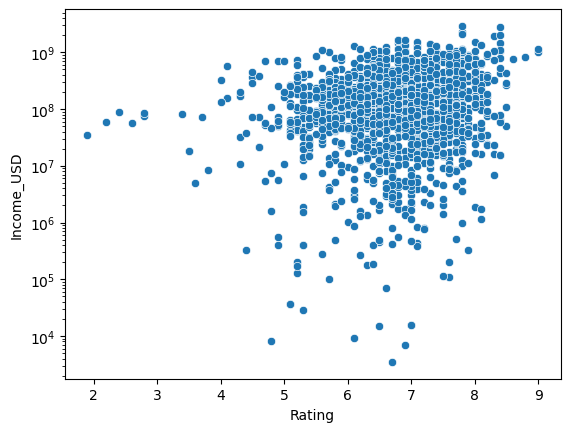

In [98]:
#Only 482 columns.
sns.scatterplot(data=merged, x='Rating', y='Income_USD')
plt.yscale('log')
